Using TensorFlow backend.


(None, 30, 30, 32)
(None, 30, 30, 32)
Ok ....
--------------------- End of loading ------------------------------
                     |Loss:  2451
Train on 7141 samples, validate on 1531 samples
Epoch 1/20
7141/7141 [==============================] - 33s 5ms/step - loss: 0.7009 - acc: 0.0022 - val_loss: 0.2180 - val_acc: 0.0039
Epoch 2/20
7141/7141 [==============================] - 30s 4ms/step - loss: 0.4763 - acc: 0.0028 - val_loss: 0.2606 - val_acc: 0.0065
Epoch 3/20
7141/7141 [==============================] - 29s 4ms/step - loss: 0.3742 - acc: 0.0038 - val_loss: 0.3394 - val_acc: 0.0059
Epoch 4/20
7141/7141 [==============================] - 29s 4ms/step - loss: 0.2827 - acc: 0.0039 - val_loss: 0.3274 - val_acc: 0.0059
Epoch 5/20
7141/7141 [==============================] - 29s 4ms/step - loss: 0.2279 - acc: 0.0045 - val_loss: 0.2349 - val_acc: 0.0026
Epoch 6/20
7141/7141 [==============================] - 29s 4ms/step - loss: 0.1837 - acc: 0.0039 - val_loss: 0.2282 - val_acc: 0

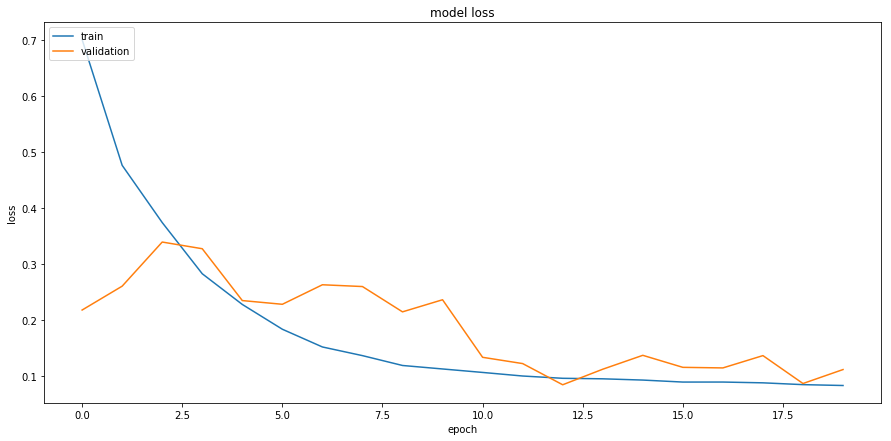

RMSE_znorm             0.094740
bias_znorm             0.084700
std_znorm              0.084700
RMSE                   0.116765
|znorm| > 0.15 (%)    10.261438
|znorm| > 3std (%)     1.568627
Name: Redshift, dtype: float64


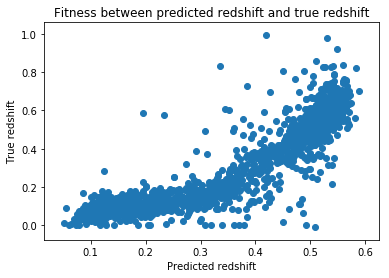

In [1]:
# For max

from keras.layers import Flatten, Conv3D, Activation , Dense, AveragePooling2D, MaxPooling3D , Dropout, Conv2D, MaxPooling2D
from keras.models import Sequential
from utils import *
from keras.utils import plot_model

model = Sequential()
# ------------- start convolution layer ------------------
L = Conv2D(32,[1,1], data_format='channels_last', activation = 'relu', padding = 'same', input_shape=(32,32,5))
model.add(L)


P = MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid', data_format='channels_last')    
model.add(P)


L1 = Conv2D(32,[2,2], data_format='channels_last', padding = 'same', activation = 'relu')
model.add(L1)

P1 = MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid', data_format='channels_last')    
model.add(P1)

"""
L2 = Conv2D(32,[2,2], data_format='channels_last', padding = 'same', activation = 'relu')
model.add(L2)

P2 = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format='channels_last')    
model.add(P2)
"""
size = model.output_shape
print(size)
# -------------- start fully connected -------------------

model.add(Flatten())
model = model_nn(model, 128, 5, dropout=0.3, batch_normalization=True, activation='relu', neurons_decay=0, starting_power=1, l2=10**-5, compile_model=True, trainable=True)
print(size)
print("Ok ....")

batch_size = 128
data = '../data/csvs/galaxies/all1_.csv';
dir_img = '../data/images/galaxies1/all/*.npy'
size_all = None
X_Train, Y_Train, X_Test, Y_Test, X_Valid, Y_Valid = get_train_test_valid_data_galaxy(data,dir_img,test_size=0.3, valid_size = 0.5, size_all = size_all)

history = model.fit(X_Train, Y_Train, validation_data=(X_Valid, Y_Valid), epochs=20, batch_size=batch_size, verbose=1)

save_model(model, './model.json')

plot_history(history)

predict = model.predict(X_Test, batch_size=batch_size).reshape(-1)
result = compute_metrics(Y_Test, predict, 'Redshift')     
print(result)
plot_result(predict, Y_Test, x_name = "Predicted redshift", y_name = "True redshift")
#plot_result(y_true, y_pred, x_name = "True redshift", y_name = "Predicted redshift",  title = "Fitness between predicted redshift and true redshift")

In [ ]:
1.
L = Conv2D(32,[3,3], data_format='channels_last', activation = 'relu', padding = 'same', input_shape=(32,32,5))
model.add(L)


P = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format='channels_last')    
model.add(P)


L1 = Conv2D(32,[2,2], data_format='channels_last', padding = 'same', activation = 'relu')
model.add(L1)

P1 = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format='channels_last')    
model.add(P1)

size = model.output_shape
print(size)

6000
RMSE_znorm            0.090546
bias_znorm            0.089462
std_znorm             0.089462
RMSE                  0.119578
|znorm| > 0.15 (%)    7.222222
|znorm| > 3std (%)    2.222222
Name: Redshift, dtype: float64
  
1.
8000
RMSE_znorm            0.280495
bias_znorm            0.280491
std_znorm             0.280491
RMSE                  0.387461
|znorm| > 0.15 (%)    9.166667
|znorm| > 3std (%)    1.166667
Name: Redshift, dtype: float64
 
2.
L = Conv2D(32,[3,3], data_format='channels_last', activation = 'relu', padding = 'same', input_shape=(32,32,5))
model.add(L)


P = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format='channels_last')    
model.add(P)


L1 = Conv2D(32,[2,2], data_format='channels_last', padding = 'same', activation = 'relu')
model.add(L1)

P1 = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format='channels_last')    
model.add(P1)

L2 = Conv2D(32,[2,2], data_format='channels_last', padding = 'same', activation = 'relu')
model.add(L2)

P2 = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format='channels_last')    
model.add(P2)

RMSE_znorm             0.136275
bias_znorm             0.082663
std_znorm              0.082663
RMSE                   0.207106
|znorm| > 0.15 (%)    35.750000
|znorm| > 3std (%)     3.250000
Name: Redshift, dtype: float64